# About Dataset

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

Souce: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

# Goals

The goal of this project is to predict whether a hotel booking will be canceled in the future. By accurately predicting cancellations, we aim to minimize financial losses due to sudden cancellations and optimize hotel occupancy management.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests
%matplotlib inline

In [ ]:
pip install dotenv

# Import Dataset

In [ ]:
with open('/content/.env', 'w') as f:
  f.write('TOKEN=')

In [ ]:
import os
from dotenv import load_dotenv

load_dotenv(dotenv_path="/content/.env", override=True)

True

In [ ]:
url = "https://raw.githubusercontent.com/Naufalfdh19/hotel_bookings/main/hotel_bookings.csv"

headers = {'Authorization': f'token {os.getenv("TOKEN")}',
           'Accept': 'application/vnd.github.v3.raw'}
response = requests.get(url, headers=headers)

df = pd.read_csv(StringIO(response.text))
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Cleaning

## Check Duplicate Data

In [ ]:
print(f'Total number of duplicated values is {df.duplicated().sum()}')

Total number of duplicated values is 31994


In [ ]:
# drop duplicate values
df = df.drop_duplicates()

# check duplicate values once again
print(f'Total number of duplicated values right now is {df.duplicated().sum()}')

Total number of duplicated values right now is 0


## Check Missing Values

In [ ]:
# check missing values for each column

df.isnull().sum().rename('Total Missing Values').sort_values(ascending=False)

,Total Missing Values
company,82137
agent,12193
country,452
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


1. Remove rows where the country column is null, since they account for only 0.4% of the data and are unlikely to affect overall analysis.

2. Drop the company column because over 90% of its values are missing, making it unsuitable for modeling or analysis.

3. Fill missing values in the agent column with the category 'Unknown', as this feature holds important information that could contribute significantly to machine learning model performance.

In [ ]:
df = df.drop(["company"], axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df['agent'] = df['agent'].fillna(df['agent'].mean())

# Explatory Data Analysis

## Distribution

In [ ]:
df_eda = df.copy()

In [ ]:
for col in df_eda.describe(include='object').columns:
    print(col)
    print(df_eda[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['GBR' 'PRT' 'USA' 'ESP' 'IRL' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU' 'FRA'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE' 'BRA'
 'FIN' 'MOZ' 'BWA' 'LUX' 'NLD' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'CYM' 'ZMB' 'ZWE'
 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV' 'HKG' 'ISR' 'IRN' 'GEO'
 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT' 'NGA' 'MDV' 'VEN'
 'SVK' 'AGO' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC' 'AZE' 'BHR'
 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR' 'MUS' 'COM'
 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 

In [ ]:
# convert undefined value to Unknown value for easier preprocessing

def convert_to_unknown(col):
  return df_eda[col].apply(lambda x: 'Unknown' if x == 'Undefined' else x)

In [ ]:
df_eda['meal'] = convert_to_unknown('meal')

In [ ]:
# print the result after converted

col = 'meal'

print(col)
print(df_eda[col].unique())
print('-'*50)

meal
['BB' 'FB' 'HB' 'SC' 'Unknown']
--------------------------------------------------


### Numerical Columns

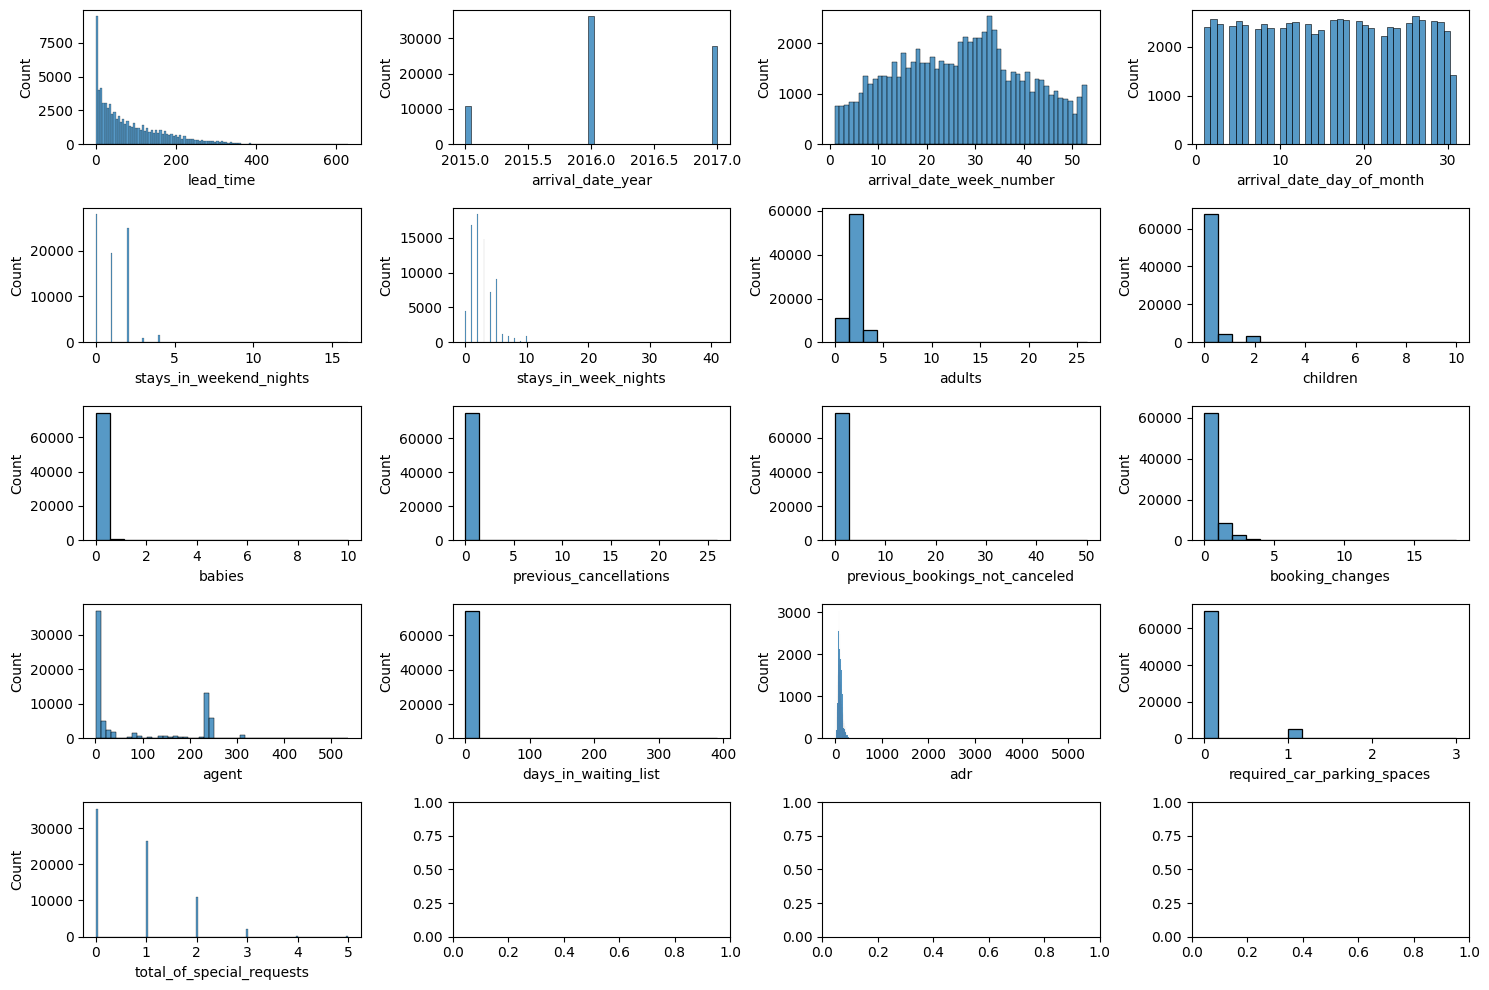

In [ ]:
# this drop_columns variable is the columns that represent categorical value but instead has a type int, like binary value
drop_columns = ['is_canceled', 'is_repeated_guest']

num_cols = df_eda.drop(drop_columns, axis=1).select_dtypes(include=["float","int"]).columns
cols = 4
rows = int(np.ceil(len(num_cols) / 4))

fig, ax = plt.subplots(rows, cols,figsize=(15,10))
ax = ax.flatten()

for i in range(len(num_cols)):
    sns.histplot(data=df_eda, x=num_cols[i], ax=ax[i])

plt.tight_layout()

In [ ]:
from scipy.stats import skew

In [ ]:
# calculate the skewness for each numerical columns

for col in num_cols:
  print(f'the skewness of {col} column: {skew(df_eda[col])}')

the skewness of lead_time column: 1.34388807421039
the skewness of arrival_date_year column: -0.31836829152235574
the skewness of arrival_date_week_number column: 0.01617199752073823
the skewness of arrival_date_day_of_month column: -0.00014499092865050852
the skewness of stays_in_weekend_nights column: 1.1894262229685006
the skewness of stays_in_week_nights column: 2.418968771972704
the skewness of adults column: 6.319411805797373
the skewness of children column: 3.312341706643377
the skewness of babies column: 23.1762278353529
the skewness of previous_cancellations column: 46.94166682740049
the skewness of previous_bookings_not_canceled column: 35.86800822460898
the skewness of booking_changes column: 5.658353620414445
the skewness of agent column: 0.8937825273656018
the skewness of days_in_waiting_list column: 18.74648463753049
the skewness of adr column: 12.995189670495336
the skewness of required_car_parking_spaces column: 3.386676360737746
the skewness of total_of_special_request

Use power transform for numerical value that have skewness > 1.

<Axes: xlabel='is_canceled', ylabel='count'>

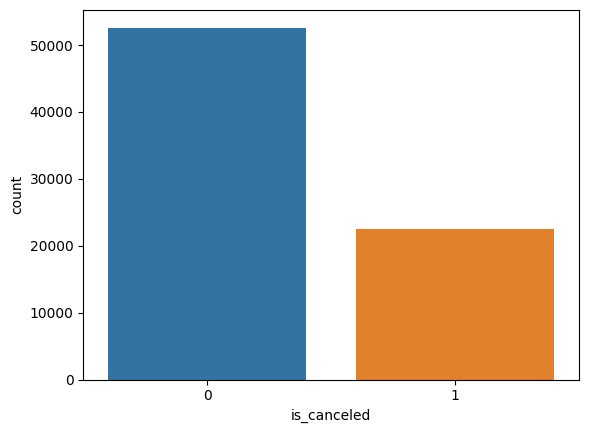

In [ ]:
# is_canceled distribution

sns.countplot(data=df_eda, x='is_canceled', hue='is_canceled', legend=False)

<Axes: xlabel='is_repeated_guest', ylabel='count'>

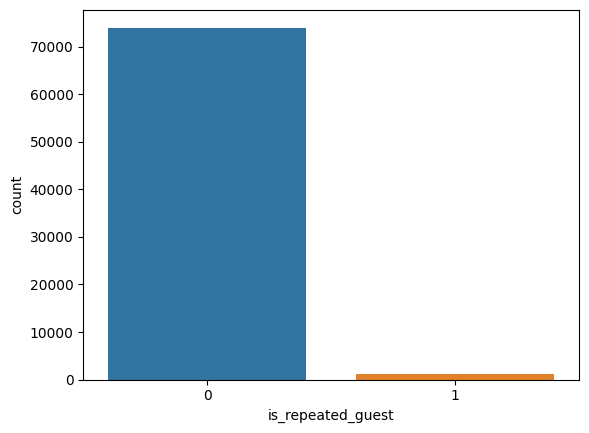

In [ ]:
# is_repeated_guest distribution

sns.countplot(data=df_eda, x='is_repeated_guest', hue='is_repeated_guest', legend=False)

### Categorical Columns


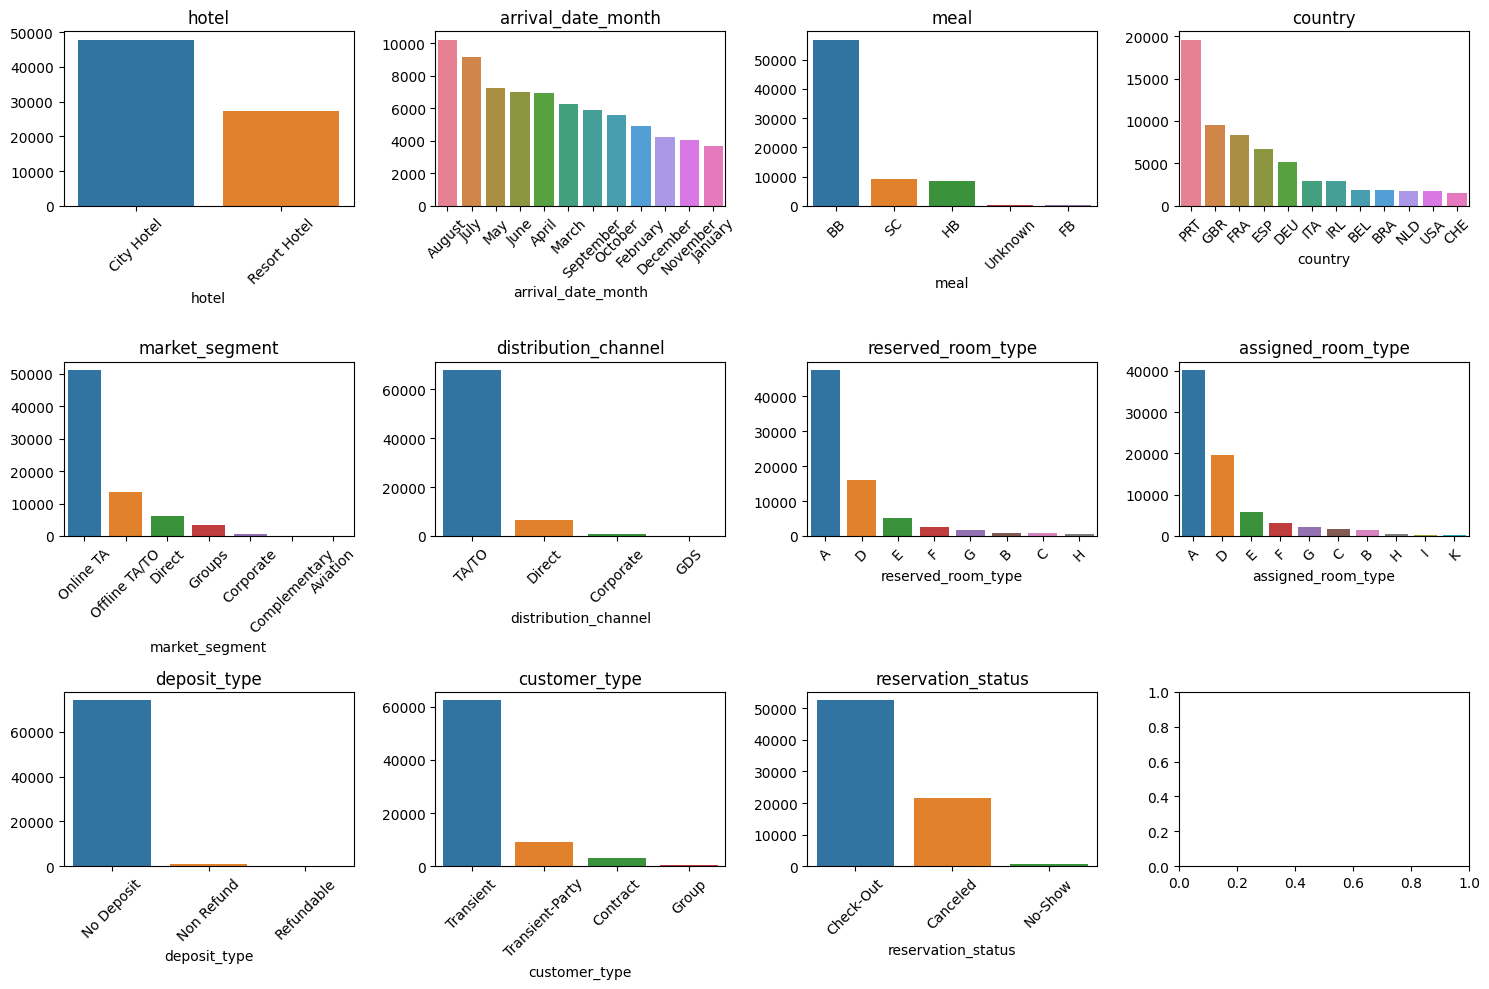

In [ ]:
cat_col = df_eda.drop(["reservation_status_date"], axis=1).select_dtypes(include=['object']).columns
cols = 4
rows = int(np.ceil(len(cat_col)/cols))

fig, ax = plt.subplots(rows, cols, figsize=(15,10))
ax = ax.flatten()

for i in range(len(cat_col)):
    col = cat_col[i]

    val_count = df_eda[col].value_counts().head(12)

    x = val_count.index
    y = val_count.values

    sns.barplot(x=x, y=y, ax=ax[i], hue=x)

    ax[i].set_title(col)
    ax[i].set_xticks(range(len(x)))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

plt.tight_layout()

# Preprocessing

In [ ]:
drop_cols = ['reservation_status_date']

df_pp = df_eda.drop(drop_cols, axis=1).copy()

## Transformation

In [ ]:
skew_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
             'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
             'days_in_waiting_list', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces']

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

transformed = pt.fit_transform(df_pp[skew_cols])

transformed_df = pd.DataFrame(transformed, columns=skew_cols, index=df.index)

df_transformed = df_pp.drop(columns=skew_cols)
df_transformed = pd.concat([df_pp, transformed_df], axis=1)

## Label Encoding

In [ ]:
df_pp['hotel'] = df_pp['hotel'].map({'Resort Hotel': 0, 'City Hotel':1})

## One Hot Encoding

In [ ]:
df_encoded = pd.get_dummies(df_transformed, drop_first=True)

df_encoded = df_encoded.loc[:, ~df_encoded.columns.str.contains('unknown')]

In [ ]:
correlations = df_encoded.corr(numeric_only=True)['is_canceled'].drop('is_canceled')
print(correlations.sort_values(ascending=False))

lead_time                       0.208965
market_segment_Online TA        0.180131
lead_time                       0.170629
country_PRT                     0.164982
reservation_status_No-Show      0.161522
                                  ...   
total_of_special_requests      -0.149217
market_segment_Offline TA/TO   -0.157161
required_car_parking_spaces    -0.181152
required_car_parking_spaces    -0.181723
reservation_status_Check-Out   -1.000000
Name: is_canceled, Length: 252, dtype: float64


## Split data into feature and target & test and train data

In [ ]:
# split into feature and target

X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))  # sesuaikan dengan komponen yg kamu mau
])

In [ ]:
# transfor feature with PCA

x_train_pca = pipeline.fit_transform(X_train)
x_test_pca = pipeline.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train_pca, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x_train_pca, y_train, cv=5, scoring='f1_weighted')

array([0.95974913, 0.95853458, 0.96015949, 0.96014373, 0.95834462])

In [ ]:
y_pred = model.predict(x_test_pca)

from sklearn.metrics import accuracy_score
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9633699633699634


In [ ]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='weighted')  # 'weighted' untuk multi-class
print("F1 Score:", score)

F1 Score: 0.9627756245224047
